## Homework 3, Problem 3 on inhomogeneous Poisson processes

ECE C143A/C243A, Spring Quarter 2018, Prof. J.C. Kao, TAs T. Monsoor, X. Jiang and X. Yang.


 In this problem, we will use the same simulated neuron as in
  Problem 2, but now the reaching angle $s$ will be time-dependent
  with the following form:
$$ s(t) = t^2 \cdot \pi,$$

where $t$ ranges between 0 and 1 second. This will be refered as *s(t)* equation in the questions.


In [1]:
"""
ECE C143/C243 Homework-3 Problem-3

"""
import numpy as np
import matplotlib.pyplot as plt
import nsp as nsp # these are helper functions that we provide.
import scipy.special

# Load matplotlib images inline
%matplotlib inline

# Reloading any code written in external .py files.
%load_ext autoreload
%autoreload 2

### (a) (6 points) Spike trains
Generate 100 spike trains, each 1 second in duration, according to
an inhomogeneous Poisson process with a firing rate profile defined
by tuning equation, $$\lambda(s) = r_0 + (r_\text{max} - r_0)\cos(s-s_\text{max})$$ 
and the $s(t)$ equation, $$ s(t) = t^2 \cdot \pi$$

In [2]:
r_0 = 35 # (spikes/s)
r_max = 60 # (spikes/s)
s_max = np.pi/2 # (radians)
T = 1000 # trial length (ms)

In [3]:
np.random.exponential(1.0/r_max * 1000)

4.740174461262221

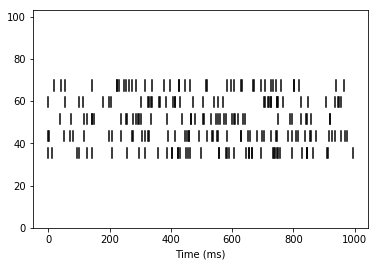

In [4]:
## 3a
num_trials = 100 # number of total spike trains
num_rasters_to_plot = 5 # number of spike trains to plot
#====================================================#
# YOUR CODE HERE:
#   Generate the spike times for 100 trials of an inhomogeneous
#   Poisson process.  Plot 5 example spike rasters.
#====================================================#
def GeneratePoissonSpikeTrain( T, rate ):
#GENERATEPOISSONSPIKETRAIN Summary of this function goes here
#   T in ms
#   r in spikes/s
#   returns spike_train, a collection of spike times

    spike_train = np.array(0)
    time = 0
    spike_train_final = []
    while time <= T:
        time_next_spike = np.random.exponential(1/rate * 1000)
        time = time + time_next_spike
        spike_train = np.append(spike_train,time)
    #discard last spike if happens after T
    if (spike_train[np.size(spike_train)-1] > T) :
        spike_train = spike_train[:-1]
    for i in range(len(spike_train)):
        random_number = np.random.uniform()
        lambda_value = r_0 + (r_max - r_0)*np.cos(((spike_train[i]/1000)**2) * np.pi - s_max)
        if random_number < lambda_value / r_max:
            spike_train_final.append(spike_train[i])
       

    return np.asarray(spike_train_final)


one_hundred_spike_trains = []
for i in range(100):
    one_hundred_spike_trains.append(GeneratePoissonSpikeTrain(1000,r_max))
    
nsp.PlotSpikeRaster(one_hundred_spike_trains[0:num_rasters_to_plot])
#====================================================#
# END YOUR CODE
#====================================================#


### (b) (5 points) Spike histogram
  Plot the spike histogram by taking spike counts in non-overlapping
  20 ms bins, then averaging across the 100 trials.  The spike
  histogram should have firing rate (in spikes / second) as the
  vertical axis and time (in msec, not time bin index) as the
  horizontal axis. Plot the expected firing rate profile defined by equations
 tuning equation and *s(t)* equation on the same plot. 

#### Question:
Does the spike histogram agree with the expected firing rate profile?

Text(0.5,0,'Time(ms)')

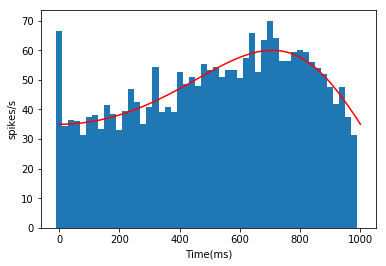

In [5]:
# 3b
bin_width = 20 # (ms)
#====================================================#
# YOUR CODE HERE:
#   Plot the spike histogram
#====================================================#
flat_list = [item for sublist in one_hundred_spike_trains for item in sublist]
full_digitized = []
bins = range(0,1001,20)
data = flat_list
full_digitized.extend(np.ndarray.tolist(np.digitize(data, bins)))
counts = [full_digitized.count(x) for x in set(full_digitized)]
counts = [x / 2. for x in counts]
plt.bar(bins[0:50],counts, width=20)

time = np.linspace(0,1000,num=100)
plt.plot(time, r_0 + (r_max - r_0)*np.cos(((time/1000)**2) * np.pi - s_max), color='red')

#====================================================#
# END YOUR CODE
#====================================================#

plt.ylabel('spikes/s')
plt.xlabel('Time(ms)')

#### Question:
Does the spike histogram agree with the expected firing rate profile?

#### Your Answer: Yes, as can be seen above, the spike histogram agrees with the expected firing profile.

### (c) (6 points) Count distribution
  For each trial, count the number of spikes across the entire trial.
  Plot the normalized distribution of spike counts.  Fit a Poisson
  distribution to this empirical distribution and plot it on top of
  the empirical distribution.  

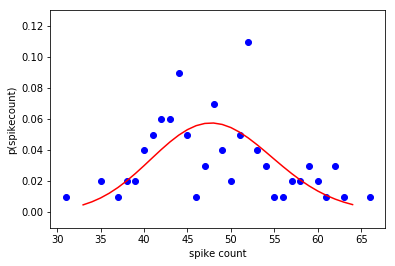

In [7]:
#====================================================#
# YOUR CODE HERE:
#   Plot the normalized distribution of spike counts
#====================================================#
from scipy.stats import poisson
one_hundred_counts = []
for i in range(100):
    one_hundred_counts.append(len(one_hundred_spike_trains[i]))
unique, counts = np.unique(one_hundred_counts, return_counts = True)
plt.scatter(unique, counts/100, color='blue')
mu = np.mean(one_hundred_counts)
x = np.arange(poisson.ppf(0.01, mu), poisson.ppf(0.99, mu))
plt.plot(x, poisson.pmf(x, mu), color='red')
#====================================================#
# END YOUR CODE
#====================================================#
plt.xlabel('spike count')
plt.ylabel('p(spikecount)')
plt.show()

#### Question:
Should we expect the spike counts to be Poisson-distributed?

#### Your Answer: In general, we should still have a poisson distribution which is clearly shown in the graph above. Since we are taking all points from a poisson distribution, even in the inhomogenous case, we should still have a poisson distribution.

### (d) (5 points) ISI distribution
  Plot the normalized distribution of ISIs.  Fit an exponential
  distribution to the empirical distribution and plot it on top of the
  empirical distribution. 

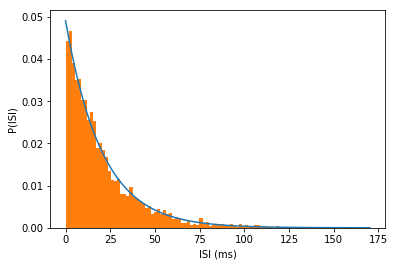

In [8]:
#====================================================#
# YOUR CODE HERE:
#   Plot the normalized distribution of ISIs
#====================================================#
relevant_values = one_hundred_spike_trains
relevant_ISI = []
for i in range(100):
    relevant_ISI.append([x - relevant_values[i][j - 1] for j, x in enumerate(relevant_values[i])][1:])
flat_list = [item for sublist in relevant_ISI for item in sublist]
flat_list_mean = np.mean(flat_list)
flat_list_lambda = 1/flat_list_mean
sampled_flat_list = np.linspace(0, max(flat_list), 100)
curve = flat_list_lambda*np.exp(-flat_list_lambda*sampled_flat_list)
plt.plot(sampled_flat_list, curve)
bins = 100
plt.hist(flat_list, bins, density=True)

#====================================================#
# END YOUR CODE
#====================================================#
plt.xlabel('ISI (ms)')
plt.ylabel('P(ISI)')
plt.show()

#### Question: 
Should we expect the ISIs to be exponentially-distributed?
(Note, it is possible for the  empirical distribution to strongly resemble an exponential distribution even if the data aren't exponentially distributed.)

#### Your Answer: In the inhomogenous case, we should not expect the ISIs to be exponentially distributed. 